In [ ]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Input,Concatenate,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import numpy as np
from keras import layers
from keras.models import load_model, model_from_json
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import os
from pathlib import Path


from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions




from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D

from tensorflow.keras.applications import ResNet50,Xception

from keras.utils import np_utils




from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization,Activation,Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1)RESNET50
base_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(224,224,3))
base_model.trainable=False
x = Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(5128, activation='relu')(x) 
out=Dense(3,activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=out, name='ResNet50')

print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()

KeyboardInterrupt: ignored

In [ ]:
#2) INCEPTIONV3
base_model=tf.keras.applications.InceptionV3(include_top=False, input_shape=(224,224,3))
base_model.trainable=False
x = Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(300, activation='relu')(x) 
out=Dense(3,activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=out, name='inceptionv3')
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
314
input_2   False
conv2d   False
batch_normalization   False
activation_188   False
conv2d_1   False
batch_normalization_1   False
activation_189   False
conv2d_2   False
batch_normalization_2   False
activation_190   False
max_pooling2d   False
conv2d_3   False
batch_normalization_3   False
activation_191   False
conv2d_4   False
batch_normalization_4   False
activation_192   False
max_pooling2d_1   False
conv2d_8   False
batch_normalization_8   False
activation_196   False
conv2d_6   False
conv2d_9   False
batch_normalization_6   False
batch_normalization_9   False
activation_194   False
activation_197   False
average_pooling2d   False
conv2d_5   False
conv2d_7   False
conv2d_10   False
conv2d_11   False
batch_normalization_5   False
batch_normalization_7   False
batch_normalization_10   False
batch_normalization_11   False
activation_193   False
activation_195   False
activation_198   False
activation_199   False
mix

In [ ]:
#3)XCEPTION
base_model=tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3))
base_model.trainable=False
x = Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
out=Dense(3,activation='softmax')(x)
x = Dense(3008, activation='relu')(x) 
x=Dropout(0.1)(x)
model = Model(inputs=base_model.inputs, outputs=out, name='Xception')
print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()

134
input_6   False
block1_conv1   False
block1_conv1_bn   False
block1_conv1_act   False
block1_conv2   False
block1_conv2_bn   False
block1_conv2_act   False
block2_sepconv1   False
block2_sepconv1_bn   False
block2_sepconv2_act   False
block2_sepconv2   False
block2_sepconv2_bn   False
conv2d_106   False
block2_pool   False
batch_normalization_106   False
add_40   False
block3_sepconv1_act   False
block3_sepconv1   False
block3_sepconv1_bn   False
block3_sepconv2_act   False
block3_sepconv2   False
block3_sepconv2_bn   False
conv2d_107   False
block3_pool   False
batch_normalization_107   False
add_41   False
block4_sepconv1_act   False
block4_sepconv1   False
block4_sepconv1_bn   False
block4_sepconv2_act   False
block4_sepconv2   False
block4_sepconv2_bn   False
conv2d_108   False
block4_pool   False
batch_normalization_108   False
add_42   False
block5_sepconv1_act   False
block5_sepconv1   False
block5_sepconv1_bn   False
block5_sepconv2_act   False
block5_sepconv2   False
block

In [ ]:
#4)MOBILENET
base_model=tf.keras.applications.MobileNet(
     include_top=False,
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,

)
base_model.trainable=False
x = Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(4000, activation='relu')(x) 

out=Dense(3,activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=out, name='MobileNet')
print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False

model.summary()

InvalidArgumentError: ignored

In [ ]:
#5)NASNETMOBILE
base_model=tf.keras.applications.NASNetMobile(include_top=False, input_shape=(224,224,3))
base_model.trainable=False
x = Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(750, activation='relu')(x) 
out=Dense(3,activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=out, name='NASNetMobile')
print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()


In [ ]:
#6)vgg16
base_model=VGG16(input_shape=(224,224,3),include_top=False)
base_model.trainable=False

x=Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x=Dropout(0.1)(x)
x=Dense(512,activation="relu")(x)
out=Dense(3,activation="softmax")(x)
model=Model(inputs=base_model.inputs,outputs=out,name='VGG16')
print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()


In [ ]:
train_path="./drive/MyDrive/chest_xray/train"
test_path="./drive/MyDrive/chest_xray/test"

trainDataGen=ImageDataGenerator(rescale=1./255, validation_split=0.1)
testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="training"
    )

valGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="validation"
)

testGen=testDataGen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=1
    )

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='SGD',metrics=['accuracy'])
history=model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//128,
    validation_data=valGen,
    epochs=7,
    validation_steps=valGen.samples//128
    
)

Epoch 1/7


InvalidArgumentError: ignored

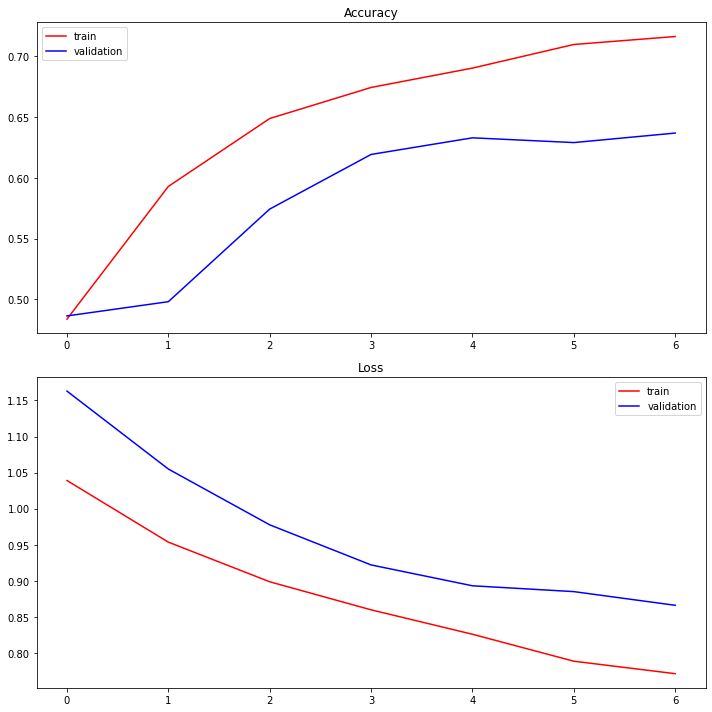

In [ ]:
#ÇİZİM GRAFİĞİ
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
#CONFUSİON MATRİX ÇİZDİRME
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(testGen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testGen.classes, y_pred)
print(cm)

print('Classification Report')
print(classification_report(testGen.classes, y_pred))



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1307: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Confusion Matrix
[[137  85  15]
 [151  73  10]
 [ 95  47  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.36      0.58      0.44       237
           1       0.36      0.31      0.33       234
           2       0.31      0.07      0.12       153

    accuracy                           0.35       624
   macro avg       0.34      0.32      0.30       624
weighted avg       0.34      0.35      0.32       624

